In [73]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [47]:
(x_train, y_train), (x_test, y_test)=tf.keras.datasets.mnist.load_data(path="mnist.npz")

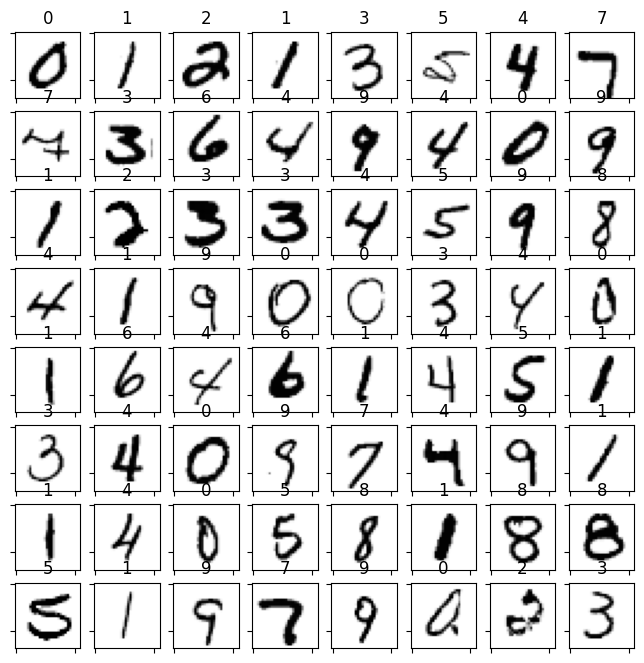

In [48]:
fig,axes = plt.subplots(8,8, figsize = (8,8),sharey=True)

m,n,z = x_train.shape

for i in axes.flat:
    randomIndex = np.random.randint(m)
    randomImg = x_train[randomIndex,:]
    i.imshow(randomImg, cmap='Greys')
    i.set_title(f'{y_train[randomIndex]}')
    i.set_yticklabels([])
    i.set_xticklabels([])


In [49]:
x_train = x_train.reshape(60000,28*28)
x_test = x_test.reshape(10000,28*28)
x_train.shape, x_test.shape

((60000, 784), (10000, 784))

In [50]:
model = tf.keras.models.Sequential([
    tf.keras.Input(shape=(784,)),
    tf.keras.layers.Dense(50, activation='relu'),
    tf.keras.layers.Dense(25, activation='relu'),
    tf.keras.layers.Dense(15, activation='relu'),
    tf.keras.layers.Dense(10, activation='linear')
])

In [51]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_18 (Dense)            (None, 50)                39250     
                                                                 
 dense_19 (Dense)            (None, 25)                1275      
                                                                 
 dense_20 (Dense)            (None, 15)                390       
                                                                 
 dense_21 (Dense)            (None, 10)                160       
                                                                 
Total params: 41075 (160.45 KB)
Trainable params: 41075 (160.45 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [52]:
model.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              optimizer=tf.keras.optimizers.Adam(learning_rate=0.001)
              )
model.fit(x_train,y_train,epochs=100)

Epoch 1/100
1875/1875 [==============================] - 2s 770us/step - loss: 1.5967
Epoch 2/100
1875/1875 [==============================] - 2s 802us/step - loss: 0.5577
Epoch 3/100
1875/1875 [==============================] - 1s 774us/step - loss: 0.3273
Epoch 4/100
1875/1875 [==============================] - 1s 793us/step - loss: 0.2507
Epoch 5/100
1875/1875 [==============================] - 1s 776us/step - loss: 0.2097
Epoch 6/100
1875/1875 [==============================] - 1s 776us/step - loss: 0.1758
Epoch 7/100
1875/1875 [==============================] - 1s 763us/step - loss: 0.1497
Epoch 8/100
1875/1875 [==============================] - 1s 765us/step - loss: 0.1356
Epoch 9/100
1875/1875 [==============================] - 1s 765us/step - loss: 0.1205
Epoch 10/100
1875/1875 [==============================] - 1s 755us/step - loss: 0.1097
Epoch 11/100
1875/1875 [==============================] - 1s 768us/step - loss: 0.1004
Epoch 12/100
1875/1875 [============================

KeyboardInterrupt: 

In [ ]:
[layer1, layer2, layer3, layer4] = model.layers
W1, b1 = layer1.get_weights()
W1

array([[-0.0435652 , -0.04040549,  0.08237176, ..., -0.04014983,
        -0.07009409,  0.0127389 ],
       [-0.04364046, -0.04803323, -0.0602876 , ...,  0.01467451,
        -0.01256377, -0.04744812],
       [ 0.02090424, -0.00895472,  0.03756929, ...,  0.00958006,
        -0.03929752,  0.05497593],
       ...,
       [ 0.05377745, -0.04716222, -0.0321304 , ..., -0.06303031,
         0.01181581,  0.03013829],
       [ 0.06582998,  0.00627887,  0.0557832 , ...,  0.07454061,
         0.00800195, -0.02401737],
       [ 0.07049068,  0.00063883,  0.00651434, ..., -0.00186762,
         0.05730896,  0.07387484]], dtype=float32)

In [ ]:
# predicted = model.predict(x_test[0, :])
test = x_test[0, :].reshape(1,784)
predicted = model.predict(test)
yhat = tf.nn.softmax(predicted)
np.argmax(yhat), y_test[0]

1/1 [==============================] - 0s 52ms/step


(7, 7)

1/1 [==============================] - 0s 12ms/step


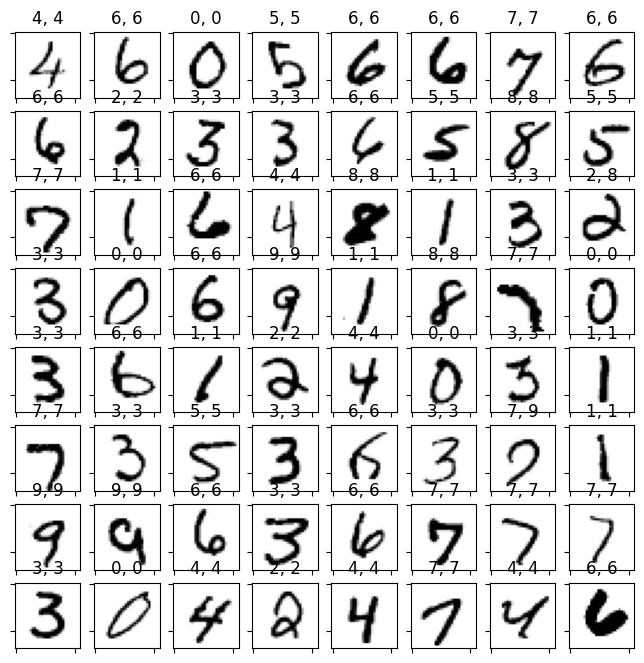

In [ ]:
fig,axes = plt.subplots(8,8, figsize = (8,8),sharey=True)

for i in axes.flat:
    randomIndex = np.random.randint(10000)
    randomImg = x_test[randomIndex,:].reshape(28,28)
    i.imshow(randomImg, cmap='Greys')
    test = x_test[randomIndex, :].reshape(1,784)
    predicted = model.predict(test)
    predicted_p = tf.nn.softmax(predicted)
    yhat = np.argmax(predicted_p)
    i.set_title(f'{y_test[randomIndex]}, {yhat}')
    i.set_yticklabels([])
    i.set_xticklabels([]) 

In [ ]:
def checkPrediction(x,y):
    wrongs = []
    m,n = x.shape
    for i in range(10000):
        y_actual = y[i]
        test = x[i].reshape(1,784)
        prediction = model.predict(test)
        yhat = np.argmax(tf.nn.softmax(prediction))
        print(yhat)
        if (y_actual != yhat):
            wrongs.append(i)
            
    return wrongs

x = checkPrediction(x_test,y_test)
len(x)

313/313 [==============================] - 0s 569us/step


<tf.Tensor: shape=(10000, 10), dtype=float32, numpy=
array([[1.0186376e-37, 2.3573559e-08, 4.9858991e-06, ..., 9.9999499e-01,
        2.2051448e-15, 4.8001175e-15],
       [0.0000000e+00, 2.5271495e-18, 1.0000000e+00, ..., 1.1138723e-28,
        5.6748353e-31, 0.0000000e+00],
       [0.0000000e+00, 1.0000000e+00, 1.7844108e-26, ..., 4.1198971e-16,
        1.1016932e-21, 0.0000000e+00],
       ...,
       [5.6136030e-23, 2.1785831e-12, 2.9491727e-21, ..., 4.1352761e-18,
        3.1417874e-20, 3.5676369e-16],
       [1.0083056e-28, 0.0000000e+00, 0.0000000e+00, ..., 0.0000000e+00,
        1.5050425e-30, 2.6727897e-32],
       [3.3752292e-26, 0.0000000e+00, 0.0000000e+00, ..., 0.0000000e+00,
        3.1467067e-19, 0.0000000e+00]], dtype=float32)>

In [ ]:
test = x_test.reshape(10000,784)
predicted = model.predict(test)
predicted_p = tf.nn.softmax(predicted)
miss  =[]
for index, i in enumerate(predicted_p):
    if (np.argmax(i) != y_test[index]):
        miss.append(index)
len(miss)

313/313 [==============================] - 0s 550us/step


350

In [110]:
x = np.concatenate((x_test, x_train))
y = np.concatenate((y_test, y_train))
x_train,x_,y_train,y_ = train_test_split(x,y, test_size=0.40, random_state=1)
x_cv,x_test,y_cv,y_test = train_test_split(x_,y_,test_size=0.50, random_state=1)
x_train.shape

linear_scale = StandardScaler()
linear_scale.fit_transform(x_train)
linear_scale.transform(x_cv)
linear_scale.transform(x_test)

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [195]:
models = []

model1 = tf.keras.models.Sequential([
    tf.keras.Input(shape=(784,)),
    tf.keras.layers.Dense(100, activation='relu'),
    tf.keras.layers.Dense(50, activation='relu'),
     tf.keras.layers.Dense(60, activation='relu'),
    tf.keras.layers.Dense(45, activation='relu'),
        tf.keras.layers.Dense(25, activation='relu'),
        tf.keras.layers.Dense(15, activation='relu'),
    tf.keras.layers.Dense(30, activation='relu'),
    tf.keras.layers.Dense(10, activation='linear')
])
models.append(model1)
model2 = tf.keras.models.Sequential([
    tf.keras.Input(shape=(784,)),
    tf.keras.layers.Dense(25, activation='relu'),
    tf.keras.layers.Dense(15, activation='relu'),
    tf.keras.layers.Dense(10, activation='linear')
])
models.append(model2)
model3 = tf.keras.models.Sequential([
    tf.keras.Input(shape=(784,)),
    tf.keras.layers.Dense(25, activation='relu'),
    tf.keras.layers.Dense(50, activation='relu'),
    tf.keras.layers.Dense(20, activation='relu'),
    tf.keras.layers.Dense(15, activation='relu'),
    tf.keras.layers.Dense(10, activation='linear')
])
models.append(model3)

    

In [196]:

models[0].compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
                  optimizer=tf.keras.optimizers.Adam(learning_rate=0.001))
models[0].fit(x_train, y_train, epochs=30)


Epoch 1/30


840/840 [==============================] - 1s 1ms/step - loss: 0.7214
Epoch 2/30
840/840 [==============================] - 1s 1ms/step - loss: 0.2715
Epoch 3/30
840/840 [==============================] - 1s 1ms/step - loss: 0.2076
Epoch 4/30
840/840 [==============================] - 1s 1ms/step - loss: 0.1744
Epoch 5/30
840/840 [==============================] - 1s 1ms/step - loss: 0.1534
Epoch 6/30
840/840 [==============================] - 1s 1ms/step - loss: 0.1368
Epoch 7/30
840/840 [==============================] - 1s 1ms/step - loss: 0.1211
Epoch 8/30
840/840 [==============================] - 1s 1ms/step - loss: 0.1028
Epoch 9/30
840/840 [==============================] - 1s 1ms/step - loss: 0.1066
Epoch 10/30
840/840 [==============================] - 1s 1ms/step - loss: 0.0853
Epoch 11/30
840/840 [==============================] - 1s 1ms/step - loss: 0.0857
Epoch 12/30
840/840 [==============================] - 1s 1ms/step - loss: 0.0714
Epoch 13/30
840/840 [===============

In [197]:
train_error = []
cv_error = []

for model in models:
    predicted = model.predict(x_train)
    predicted_p = tf.nn.softmax(predicted)
    predicted = [np.argmax(x) for x in predicted_p]
    train_error_p = np.mean(predicted != y_train)
    train_error.append(train_error_p)

    predicted = model.predict(x_cv)

    predicted_p = tf.nn.softmax(predicted)
    predicted = [np.argmax(x) for x in predicted_p]
    cv_error_p = np.mean(predicted != y_cv)
    cv_error.append(cv_error_p)


280/280 [==============================] - 0s 548us/step


In [198]:
train_error, cv_error

([0.009188988095238096, 0.9102306547619048, 0.8763020833333334],
 [0.04185267857142857, 0.9095982142857143, 0.8783482142857143])

In [199]:
predicted = models[0].predict(x_test)
predicted_p = tf.nn.softmax(predicted)
miss = []
for index, i in enumerate(predicted_p):
    if (np.argmax(i) != y_test[index]):
        miss.append(index)
len(miss)

  1/280 [..............................] - ETA: 3s

280/280 [==============================] - 0s 659us/step


304